1 Logistic Regression [30 pts]
One of the ways to avoid overfitting is by regularizing the weights. In this problem, we will observe how the model gets regularized using the same data set from HW3.

This assignment was also painful to do. Makes me sad. I used a LOT of youtube as there were part of the lecture code I was still confused from. I used the lecture code as a baseline before learning more from the youtubers. Youtubers like codebasics, Kindson The Genius, AssemblyAI (this is a youtube channel), and Coding Lane helped me HEAVILY. The importing modules also includes importing warnings. I am doing this on my laptop rather than my computer, where for some reason python is installed twice rather than once, and vscode is reading from both. Fixing this issue would raise warnings, so I included for the sake of the homework assignment. The warnings should not come up for you. Thank you and have a good day.

Importing Modules:

In [22]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor


import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)


a. [10 pts] Regularize a Sklearn.linear model.LogisticRegression model with a hyperparameter penalty=’l1’ (Lasso regularization) to visualize the convergence of weights as a regularization term, λ, changes. In the regularization validation, there is a hyperparameter to be concerned about. The model needs to be trained iteratively by tunning a hyperparameter, C= λ−1, whose default value is 1. A hyperparameter solver=’saga’, which is one of the fastest convergence solvers for any regularization in LogisticRegression(), must be used when ’l1’ penalty parameter is used.

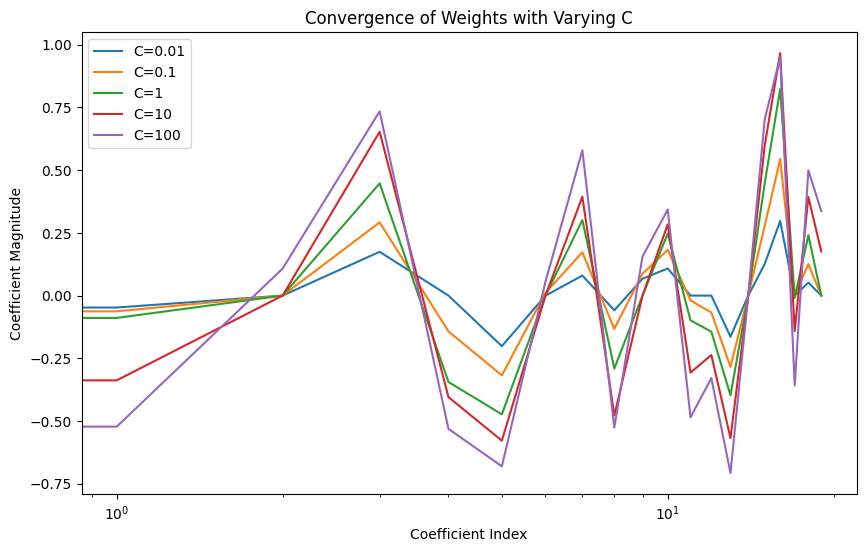

In [23]:
X, y= datasets.make_blobs(n_samples=400, n_features=5, centers=4, cluster_std=2, random_state=100)
valList= [0.01, 0.1, 1, 10, 100]
wList= []

for spot in valList:
    temp = LogisticRegression(penalty='l1', solver='saga', C=spot, max_iter=10000, random_state= 42)
    temp.fit(X, y)
    wList.append(temp.coef_)

plt.figure(figsize=(10, 6))
for spot, weight in enumerate(wList):
    plt.plot(weight.ravel(), label=f'C={valList[spot]}')

plt.xscale("log")
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Magnitude")
plt.title("Convergence of Weights with Varying C")
plt.legend()
plt.show()

b. [10 pts] Explain which feature is the most important in each class.

In [24]:
for x, cfList in enumerate(temp.coef_):
    largest = np.argmax(np.abs(cfList))
    largest = cfList[largest]
    print(f"Class {x}: Feature {largest} is the most important with a coefficient value of {largest:.4f}.")
'''In terms of what gets decided, it is the largest absolute value term, which another way of saying is the one that coverges to 0 the quickest.'''

Class 0: Feature 0.7343288079112849 is the most important with a coefficient value of 0.7343.
Class 1: Feature -0.6804037083727448 is the most important with a coefficient value of -0.6804.
Class 2: Feature -0.7075522487587211 is the most important with a coefficient value of -0.7076.
Class 3: Feature 0.9515608197838402 is the most important with a coefficient value of 0.9516.


'In terms of what gets decided, it is the largest absolute value term, which another way of saying is the one that coverges to 0 the quickest.'

c. [10 pts] Do a similar as done in a) to show that Ridge regularization (penalty=’l2’) always has a sparse solution. Explain if a sparse solution is expected.

In [25]:
rdg = LogisticRegression(penalty='l2', solver='saga', C=1.0)
rdg.fit(X, y)
coe = rdg.coef_
non_zero_coefficients = np.count_nonzero(coe, axis=1)
print(f"Number of non-zero coefficients for each class: {non_zero_coefficients}")

Number of non-zero coefficients for each class: [5 5 5 5]


2 Neural Network Regression [40 pts]
Consider neural networks with one hidden layer, as discussed during the lecture. The forward propagation prediction was implemented. Complete the backward propagation codes. Using the given example in the lecture.
x = np.array( [0.7,0.1,0.3,0.5] ).reshape( 1 , 4 )
y = np.array( [ 1 . 5 ] ).reshape(−1 ,1)
w1 = np.array( [ [ 0 . 1 6 , 0 . 1 6 ] , [ 0 . 0 2 , 0 . 2 5 ] , [ 0 . 6 3 , 0 . 2 2 ] , [ 0 . 3 6 , 0 . 2 9 ] ] )
w2 = np.array( [ 0 . 0 5 , 0 . 3 3 ] )

a. (10 pts) Perform the backward propagation from the output layer to the hidden layer. Compute δ2 and dE/dW2 . Then, update W2. Use the learning rate η = 0.1.

In [26]:
x = np.array([0.7, 0.1, 0.3, 0.5]).reshape(1, 4)
y = np.array([1.5]).reshape(-1, 1)
w1 = np.array([[0.16, 0.16], [0.02, 0.25], [0.63, 0.22], [0.36, 0.29]])
w2 = np.array([0.05, 0.33]).reshape(2, 1)

z1 = np.dot(x, w1)
a1 = np.tanh(z1)
z2 = np.dot(a1, w2)
a2 = z2
dA2 = a2 - y
dW2 = np.dot(a1.T, dA2)
learning_rate = 0.1
w2 = w2 - learning_rate * dW2


b. (15 pts) Perform the backward Propagation from the hidden layer to the input layer. Compute δ1 and dE/dW1 . Then, update W1. Use the learning rate η = 0.1.

In [27]:
dZ1 = np.dot(dA2, w2.T) * (1 - np.power(a1, 2))
dW1 = np.dot(x.T, dZ1)
w1 = w1 - learning_rate * dW1

c. (10 pts) Put the forward and backward propagation codes together in a for-loop to observe the error convergence.

In [28]:
for spot in range(1000):
    z1 = np.dot(x, w1)
    a1 = np.tanh(z1)
    z2 = np.dot(a1, w2)
    a2 = z2
    dA2 = a2 - y
    dW2 = np.dot(a1.T, dA2)
    dZ1 = np.dot(dA2, w2.T) * (1 - np.power(a1, 2))
    dW1 = np.dot(x.T, dZ1)
    w1 = w1 - learning_rate * dW1
    w2 = w2 - learning_rate * dW2

    '''Error Convergence (For every 100 loops)'''
    if spot % 100 == 0:
        print(f"Iteration {spot}, Error: {np.mean(np.square(y - a2))}")


Iteration 0, Error: 1.7182041601606526
Iteration 100, Error: 3.070562171498676e-13
Iteration 200, Error: 6.859589305155884e-27
Iteration 300, Error: 1.9721522630525295e-31
Iteration 400, Error: 1.9721522630525295e-31
Iteration 500, Error: 1.9721522630525295e-31
Iteration 600, Error: 1.9721522630525295e-31
Iteration 700, Error: 1.9721522630525295e-31
Iteration 800, Error: 1.9721522630525295e-31
Iteration 900, Error: 1.9721522630525295e-31


d. (5 pts) Use Scikit-learn Neural Network to predict the target variable. Any hyperparameters can be tuned as shown in the notebook file.

In [29]:
y = y.ravel()
nn = MLPRegressor(hidden_layer_sizes=(2,), activation='tanh', solver='sgd', learning_rate_init=0.1, max_iter=10000)
nn.fit(x, y)
print("Target Variable Prediction: ", nn.predict(x)[0])

Target Variable Prediction:  1.504281029467085
